In [27]:
#importing necessary libraries
import pandas as pd
import numpy as np
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Xiaomi India Case.xlsx')

In [3]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,43200,Wednesday,Chrome,29,4,11.3,6627.0
1,43192,Wednesday,Chrome,29,4,11.3,6627.0
2,43184,Wednesday,Chrome,8,5,5.0,3648.0
3,43173,Wednesday,Firefox,32,3,12.7,7094.0
4,43167,Wednesday,Chrome,18,2,11.0,4054.0


In [4]:
df.drop('Customer',axis=1,inplace = True) #Axis=0 is for Rows and axis=1 is for columns

In [5]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,Wednesday,Chrome,29,4,11.3,6627.0
1,Wednesday,Chrome,29,4,11.3,6627.0
2,Wednesday,Chrome,8,5,5.0,3648.0
3,Wednesday,Firefox,32,3,12.7,7094.0
4,Wednesday,Chrome,18,2,11.0,4054.0


In [6]:
#Homework: Make  a list of categorical and continuous columns

cat =[]
con =[]
for column in df.columns:
    if df[column].dtype != 'object':
        print(f'This {column} is a continuous column')
        con.append(column)
        
    else:
        cat.append(column)
        print(f'This {column} is a categorical column')
        
print(con)
print(cat)

This Day is a categorical column
This Browser is a categorical column
This No. of Clicks is a continuous column
This Pages Viewed is a continuous column
This Time (min) is a continuous column
This Amount Spent (Rs.) is a continuous column
['No. of Clicks', 'Pages Viewed', 'Time (min)', 'Amount Spent (Rs.)']
['Day', 'Browser']


In [7]:
def custom_summary(df):
    result =[]
    for col in list(df.columns):
        stats = OrderedDict({"featureName":col,
                            "count":df[col].count(),
                            "datatype":df[col].dtype,
                            "min":df[col].min(),
                            "Q1":df[col].quantile(0.25),
                            "Q2":df[col].quantile(0.5),
                            "Q3":df[col].quantile(0.75),
                            "Q4":df[col].quantile(1.0),
                            "mean":df[col].mean(),
                            "stdv":df[col].std(),
                            "var":df[col].var(),
                            "kurt":df[col].kurt(),
                            "skew":df[col].skew(),
                            "range":df[col].min() - df[col].max(),
                            "IQR": df[col].quantile(0.75) - df[col].quantile(0.25)
                            })
        if df[col].skew()<-1.0:
            label = "Highly negatively skewed"
        elif -1.0<df[col].skew()<-0.5:
            label = "moderately negatively skewed"
        elif -0.5<df[col].skew()<0.5:
            label = "fairly symmetric"
        elif -0.5<df[col].skew()<0.5:
            label = "moderately positively skewed"
        else:
            label = "Highly positively skewed"
            
        stats['skewness comment'] = label;
        
        #Outliers identification
        upper_limit = stats['Q3'] + (1.5*stats['IQR'])
        lower_limit = stats['Q1'] - (1.5*stats['IQR'])
        if len([x for x in df[col] if x <lower_limit or x>upper_limit ]) > 0:
            outliers_label = "Has outliers"
        else:
            outliers_label = "No outliers"
        
        stats['Outlier comment'] = outliers_label
        #count =0
        #if (x for x in df[col] if x <lower_limit) or (x for x in df[col] if x>upper_limit):
        #    count +=1
        
        stats['number of outliers'] = len([x for x in df[col] if x <lower_limit or x>upper_limit ])
        stats['Percentage of outliers'] = stats['number of outliers']*100/stats['count']
        
        result.append(stats)
    resultdf = pd.DataFrame(data=result)
    return resultdf
    

In [8]:
custom_summary(df[['No. of Clicks', 'Pages Viewed', 'Time (min)']])

,featureName,count,datatype,min,Q1,Q2,Q3,Q4,mean,stdv,var,kurt,skew,range,IQR,skewness comment,Outlier comment,number of outliers,Percentage of outliers
0,No. of Clicks,5184,int64,8.0,15.0,23.5,30.0,32.0,22.000000,8.889052,79.015242,-1.462839,-0.307708,-24.0,15.0,fairly symmetric,No outliers,0,0.0
1,Pages Viewed,5184,int64,2.0,3.0,4.5,5.0,6.0,4.166667,1.343839,1.805904,-1.151669,-0.305405,-4.0,2.0,fairly symmetric,No outliers,0,0.0
2,Time (min),5184,float64,5.0,11.0,12.0,15.1,19.5,12.433333,4.391956,19.289276,-0.488430,-0.085135,-14.5,4.1,fairly symmetric,No outliers,0,0.0


In [9]:
def odt_plots(df, col):
    fig,(ax1, ax2, ax3) = plt.subplots(1,3,figsize = (16,5))
    
    kwargs = {'fontsize':15, 'color':'black'}    #key word arguements
    
    #box plot with outliers
    sns.boxplot(df[col],ax=ax1,color = 'b')
    ax1.set_title('Box plot for '+col, **kwargs)
    ax1.set_xlabel('values', **kwargs)
    ax1.set_ylabel('Box distribution', **kwargs)
    
    #histogram with outliers
    sns.distplot(df[col],ax=ax2,color = 'r', fit=sc.norm)
    ax2.set_title('Histogram plot for '+col, **kwargs)
    ax2.set_xlabel('values', **kwargs)
    ax2.set_ylabel('Histrogram', **kwargs)
    
    #histogram with no outliers
    y = df
    sns.distplot(y[col], ax = ax3, color = 'y', fit=sc.norm)
    plt.show()
    

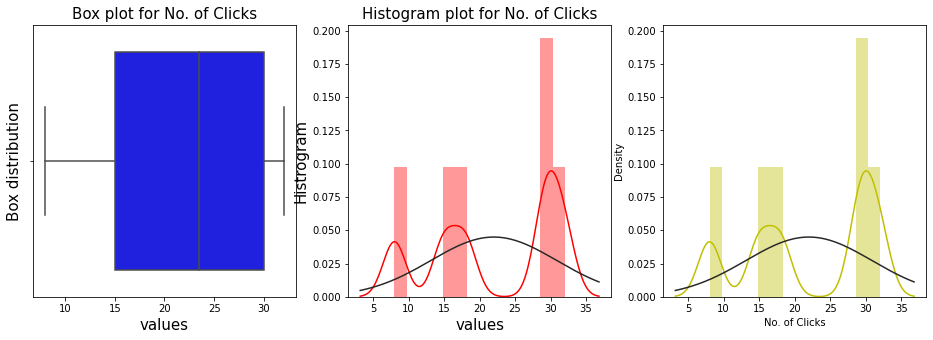

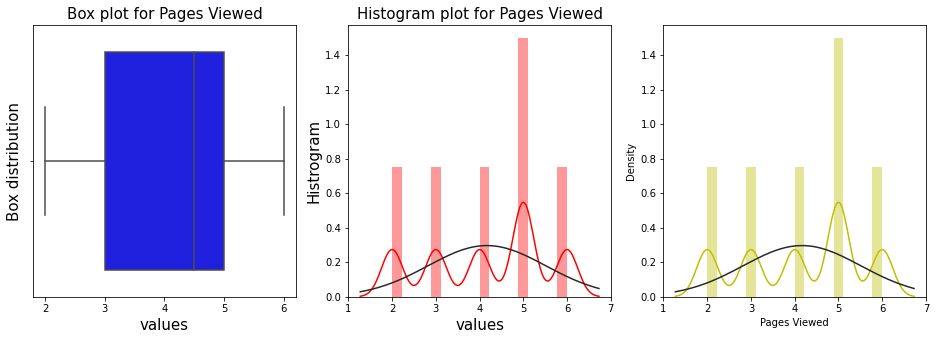

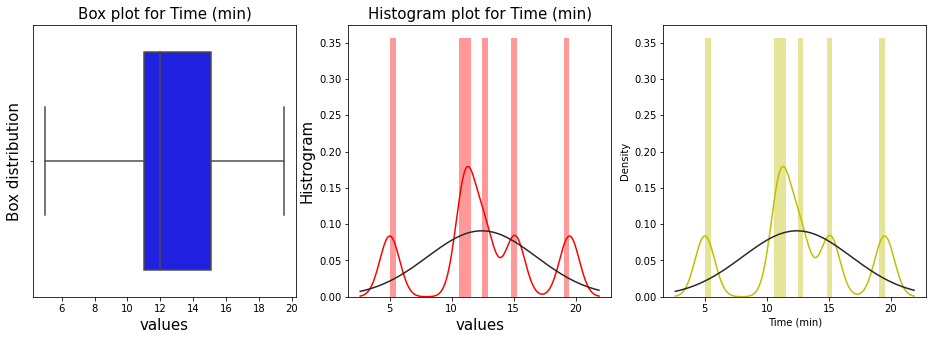

In [10]:
for col in df[['No. of Clicks', 'Pages Viewed', 'Time (min)']]:
    odt_plots(df[['No. of Clicks', 'Pages Viewed', 'Time (min)']], col)

In [11]:
#An object for label encoder
le = LabelEncoder()

In [12]:
df['Day'] = le.fit_transform(df['Day'])
df['Browser'] = le.fit_transform(df['Browser'])

In [13]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,0,0,29,4,11.3,6627.0
1,0,0,29,4,11.3,6627.0
2,0,0,8,5,5.0,3648.0
3,0,1,32,3,12.7,7094.0
4,0,0,18,2,11.0,4054.0


In [14]:
x = df.drop('Amount Spent (Rs.)', axis=1)

In [15]:
y = df[['Amount Spent (Rs.)']]

In [16]:
#Performing train - test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)


In [17]:
y_train.head()

,Amount Spent (Rs.)
1332,3648.0
4777,3648.0
1768,6627.0
3374,3648.0
2467,3269.0


In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3628, 5), (1556, 5), (3628, 1), (1556, 1))

# Model Building

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train, y_train)

LinearRegression()

## Evaluating model performance

In [21]:
lr_pred = lr.predict(x_test)

In [22]:
r2_score(y_test, lr_pred)

0.9661514898729584

In [23]:
dt = DecisionTreeRegressor()

In [24]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [25]:
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)

In [28]:
print('Accuracy of training data is ', r2_score(y_train, dt_pred_train))
print('Accuracy of testing data is ', r2_score(y_test, dt_pred_test))

Accuracy of training data is  1.0
Accuracy of testing data is  1.0
